<a href="https://colab.research.google.com/github/Vi-Ku/Intro-to-Pytorch/blob/master/Neural_network_Design_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
cd /content/drive/My Drive/Udacity_courses/Facial_keypoints_project/P1_Facial_Keypoints

/content/drive/My Drive/Udacity_courses/Facial_keypoints_project/P1_Facial_Keypoints


In [0]:
!ls

'1. Load and Visualize Data.ipynb'			  images
'2. Define the Network Architecture.ipynb'		  LICENSE
'3. Facial Keypoint Detection, Complete Pipeline.ipynb'   models.py
'4. Fun with Keypoints.ipynb'				  README.md
 data							  requirements.txt
 data_load.py						  saved_models
 detector_architectures


In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as I
#importing important utilities for defining the model architecture

In [0]:
class Net(nn.Module):
  #defining the architecture of the Net and the flow of the data
  def __init__(self):
    #creating a overall  architecture for the Net, based  on a research paper
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(1,64,5)
    self.pool1=nn.MaxPool2d(2)
    self.dropout1=nn.Dropout(0.05)
    self.conv2=nn.Conv2d(32,128,4)
    self.pool2=nn.MaxPool2d(2)
    self.dropout2=nn.Dropout(0.15)
    self.conv3=nn.Conv2d(64,256,3)
    self.pool3=nn.MaxPool2d(2)
    self.dropout3=nn.Dropout(0.25)
    self.conv4=nn.Conv2d(128,512,2)
    self.pool4=nn.MaxPool2d(2)
    self.dropout4=nn.Dropout(0.3)
    self.conv5=nn.Conv2d(256,1024,1)
    self.pool5=nn.MaxPool2d(2)
    self.dropout6=nn.Dropout(0.45)
    self.dense1=nn.Linear(512,512)
    self.dropout7=nn.Dropout(0.6)
    self.dense2=nn.Linear(512,512)
    self.dropout8=nn.Dropout(512,256)
    self.dense3=nn.Linear(256,256)
    self.dropout9=nn.Dropout(0.5)
    self.dense4=nn.Linear(256,136)

  def forward(self,x):
    x = self.pool1(F.elu(self.conv1(x)))
    x=self.dropou1(x)
    x = self.pool2(F.elu(self.conv2(x)))
    x=self.dropou2(x)
    x = self.pool3(F.elu(self.conv3(x)))
    x=self.dropou3(x)
    x = self.pool4(F.elu(self.conv4(x)))
    x=self.dropou4(x)
    x = self.pool5(F.elu(self.conv5(x)))
    x=self.dropou6(x)
    x = x.view(1, -1)
    #flattening the Conv output
    x=F.elu(self.dense1)
    x=self.dropou7(x)
    x=F.elu(self.dense2)
    x=self.dropou8(x)
    x=F.relu(self.dense3)
    x=self.dropou9(x)
    x=self.dense4(x)
    return x


# Testing numpy tutorial from pytorch Scholarship challenge

In [0]:
import torch
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
torch.manual_seed(7)

In [0]:
features=torch.randn((1,5))
weights=torch.rand_like(features)
bias=torch.randn((1,1))


In [0]:
y=activation(bias+torch.matmul(features,weights.view(5,1)))

In [0]:
y.shape

torch.Size([1, 1])

In [0]:
features=torch.randn((1,3))
w1=torch.randn((3,2))
w2=torch.randn((2,1))
bias1=torch.randn((1,2))
bias2=torch.randn((1,1))

In [0]:
y1=activation(bias1+torch.matmul(features,w1))
output=activation(bias2+torch.matmul(y1,w2))

In [0]:
w1=torch.randn((10,5))
w2=w1.numpy()

In [0]:
print(w1,type(w1),'\n',w2,type(w2))

tensor([[ 1.7518,  0.9796,  0.4105,  1.7675, -0.0832],
        [ 0.5087,  1.1178,  1.1286,  0.5013,  1.4206],
        [ 1.1542, -1.5366, -0.5577, -0.4383,  1.1572],
        [ 0.0889, -0.4073,  0.5317, -0.7420, -0.6375],
        [-1.5786,  0.6460,  0.0756, -0.1525,  0.4603],
        [-1.1532, -0.6894, -0.0495, -1.2239,  0.6403],
        [ 0.6839,  1.6132,  0.6398,  0.6094,  0.6340],
        [ 1.0036, -2.1881, -0.9927,  0.8885, -1.4867],
        [-0.8898,  0.9005,  0.1451,  1.3705, -0.3759],
        [ 0.1689, -0.5415, -0.1605,  0.9327,  0.0649]]) <class 'torch.Tensor'> 
 [[ 1.7518253   0.97956574  0.41050482  1.7674973  -0.08318937]
 [ 0.5087058   1.1178118   1.1285713   0.5012707   1.420551  ]
 [ 1.154209   -1.5365686  -0.55768406 -0.43833473  1.1571867 ]
 [ 0.08894288 -0.40727082  0.5316965  -0.74195886 -0.63754964]
 [-1.5786136   0.6460026   0.07562914 -0.15253016  0.46031657]
 [-1.1532081  -0.68942523 -0.04951321 -1.2239242   0.6402726 ]
 [ 0.6839443   1.6132339   0.6397976   0.60941

In [0]:
w2[0,2]=5

In [0]:
print(w1,'\n',w2)

tensor([[ 1.7518,  0.9796,  5.0000,  1.7675, -0.0832],
        [ 0.5087,  1.1178,  1.1286,  0.5013,  1.4206],
        [ 1.1542, -1.5366, -0.5577, -0.4383,  1.1572],
        [ 0.0889, -0.4073,  0.5317, -0.7420, -0.6375],
        [-1.5786,  0.6460,  0.0756, -0.1525,  0.4603],
        [-1.1532, -0.6894, -0.0495, -1.2239,  0.6403],
        [ 0.6839,  1.6132,  0.6398,  0.6094,  0.6340],
        [ 1.0036, -2.1881, -0.9927,  0.8885, -1.4867],
        [-0.8898,  0.9005,  0.1451,  1.3705, -0.3759],
        [ 0.1689, -0.5415, -0.1605,  0.9327,  0.0649]]) 
 [[ 1.7518253   0.97956574  5.          1.7674973  -0.08318937]
 [ 0.5087058   1.1178118   1.1285713   0.5012707   1.420551  ]
 [ 1.154209   -1.5365686  -0.55768406 -0.43833473  1.1571867 ]
 [ 0.08894288 -0.40727082  0.5316965  -0.74195886 -0.63754964]
 [-1.5786136   0.6460026   0.07562914 -0.15253016  0.46031657]
 [-1.1532081  -0.68942523 -0.04951321 -1.2239242   0.6402726 ]
 [ 0.6839443   1.6132339   0.6397976   0.60941255  0.6339749 ]
 [ 1.0

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#for rendering high quality  images in the current Windows

In [0]:
import numpy as np
import torch
import  helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])
#Creating an transformation for preprocessing the images
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
#loading the MNIST dataset from datasets module and applying the transform on it.

In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
dataiter=iter(trainloader)
image,label=dataiter.next()
print(type(image),print(image.shape))

torch.Size([64, 1, 28, 28])
<class 'torch.Tensor'> None


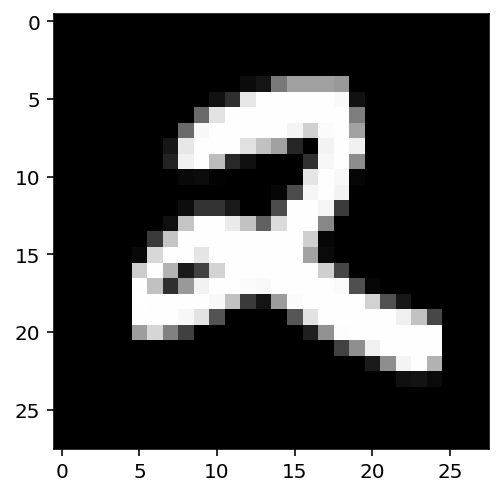

In [0]:
plt.imshow(image[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
features=image.view(image.shape[0],-1)
w1=torch.randn((784,256))
bias1=torch.randn((1,256))
weight=torch.randn((256,10))
bias2=torch.randn((1,10))

In [0]:
h1=activation(bias1+torch.matmul(features,w1))
output_class=activation(bias2+torch.matmul(h1,weight))

NameError: ignored

In [0]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
probability=softmax(output_class)

NameError: ignored

In [0]:




print(probability.shape)

In [0]:

probability.sum(dim=1)
print(probability)

# Using Objects to create Network in Pytorch

In [0]:
from torch import nn
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):
    x=self.hidden(x)
    x=self.sigmoid(x)
    x=self.output(x)
    x=self.softmax(x)
    return x

In [0]:
net=Network()
print(net)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


In [0]:
print(net.hidden.weight)

Parameter containing:
tensor([[-0.0353, -0.0077,  0.0077,  ..., -0.0141, -0.0250, -0.0309],
        [ 0.0069,  0.0073,  0.0226,  ..., -0.0029,  0.0021, -0.0124],
        [ 0.0113, -0.0333,  0.0262,  ..., -0.0252, -0.0152, -0.0341],
        ...,
        [-0.0064, -0.0016,  0.0165,  ..., -0.0255,  0.0062,  0.0350],
        [-0.0307,  0.0048,  0.0141,  ..., -0.0211,  0.0212,  0.0206],
        [-0.0267, -0.0048, -0.0328,  ..., -0.0185,  0.0228, -0.0214]],
       requires_grad=True)


In [0]:
print(net.hidden.bias)

Parameter containing:
tensor([-0.0067,  0.0173, -0.0057,  0.0170,  0.0193,  0.0149,  0.0319,  0.0179,
        -0.0215, -0.0356, -0.0266, -0.0201, -0.0289, -0.0167,  0.0058,  0.0248,
         0.0155, -0.0101,  0.0132,  0.0258,  0.0312,  0.0063,  0.0133, -0.0127,
        -0.0195, -0.0070,  0.0005,  0.0125,  0.0089,  0.0171, -0.0302,  0.0045,
        -0.0304,  0.0298,  0.0178, -0.0154, -0.0039, -0.0001, -0.0189,  0.0073,
        -0.0264,  0.0221,  0.0256, -0.0253, -0.0093, -0.0265,  0.0234,  0.0109,
         0.0196,  0.0067, -0.0311, -0.0330,  0.0065, -0.0062, -0.0264,  0.0051,
        -0.0093, -0.0233, -0.0164,  0.0165,  0.0004, -0.0100, -0.0278,  0.0070,
         0.0221, -0.0265, -0.0227, -0.0214, -0.0060, -0.0205,  0.0316,  0.0249,
         0.0094, -0.0290,  0.0353,  0.0324, -0.0091,  0.0186,  0.0282,  0.0066,
         0.0025,  0.0166,  0.0314,  0.0309, -0.0228,  0.0067,  0.0082, -0.0308,
         0.0334, -0.0236, -0.0064,  0.0173, -0.0066,  0.0044,  0.0121,  0.0025,
        -0.0037,  

In [0]:
from torch.nn import functional as F

In [0]:
class Try(nn.Module):
  def __init__(my):
    super().__init__()
    my.hidden=nn.Linear(784,256)
    my.output=nn.Linear(256,10)
  def forward(my, x):
    x=F.sigmoid(my.hidden(x))
    x=F.softmax(my.output(x))
    return x


In [0]:
net=Try()
print(net)

Try(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)


## Buiding an Nework for the given Exercise

In [0]:
from torch.nn import functional as F

In [0]:
class Exercise(nn.Module):
  def __init__(test):
    super().__init__()
    test.hidden1=nn.Linear(784,128)
    test.hidden2=nn.Linear(128,64)
    test.output=nn.Linear(64,10)

  def forward(test,x):
    x=test.hidden1(x)
    x=F.relu(x)
    x=test.hidden2(x)
    x=F.relu(x)
    x=test.output(x)
    x=F.softmax(x)
    return x

In [0]:
net=Exercise()
net.output.bias
#printing bias values of the output layer

Parameter containing:
tensor([-0.0641, -0.0404,  0.0468, -0.0806,  0.0233,  0.1074, -0.0966, -0.1169,
         0.0646,  0.0384], requires_grad=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


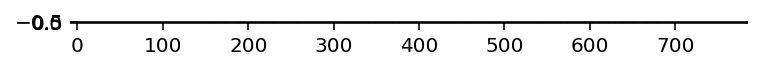

In [0]:
image.resize_(64,1,784)
img_idx=0
ps=net.forward(image[img_idx,:])
img=image[img_idx]
plt.imshow(img)
#helper.view_classify(img.view(1,28,28),ps)
#helper.view_classify(img.view(1,28,28),ps)

In [0]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.Softmax(dim=1))


In [0]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [0]:
print(model[4],model[4].weight)

Linear(in_features=64, out_features=10, bias=True) Parameter containing:
tensor([[-0.1036,  0.0392,  0.0918,  0.0349, -0.0070,  0.0738, -0.0801, -0.1150,
          0.0531,  0.0099, -0.0943,  0.0100, -0.0427,  0.0915, -0.1111,  0.0360,
         -0.0886, -0.0909, -0.0232, -0.1116,  0.1019,  0.0164,  0.1218, -0.0822,
         -0.0694, -0.1077,  0.0033,  0.0971, -0.1241, -0.1244, -0.0619,  0.1124,
          0.1209, -0.0525, -0.1133, -0.0466,  0.0931, -0.0137, -0.1122,  0.1169,
          0.0959,  0.0711, -0.0991,  0.0749,  0.0777,  0.0010,  0.0640,  0.1140,
          0.0934,  0.0098,  0.0537, -0.0622, -0.0894,  0.0377,  0.0361, -0.0243,
          0.0849,  0.0590,  0.0592, -0.0928,  0.0063,  0.0869, -0.0018,  0.0401],
        [-0.0983,  0.0679,  0.0931,  0.0793, -0.0123,  0.0656,  0.0701, -0.0505,
          0.0675, -0.0378, -0.1221,  0.0679, -0.0396, -0.0392, -0.0578, -0.0360,
          0.0270,  0.0396,  0.0191, -0.0706, -0.0538,  0.0152, -0.0024,  0.0579,
         -0.0303,  0.0082,  0.1200,

In [0]:
from collections import OrderedDict
model=nn.Sequential(OrderedDict([('fc1',nn.Linear(784,128)),('relu1',nn.ReLU()),('fc2',nn.Linear(128,64)),('relu2',nn.ReLU()),('fc3',nn.Linear(64,10)),('soft1',nn.Softmax(dim=1))]))

In [0]:
data=torch.manual_seed(10)

In [0]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))

In [0]:
criterion=nn.NLLLoss()
#defining loss function for the given model as it is an classification task
images,label=next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits=model(images)
loss=criterion(logits,label)
print(loss)

tensor(2.2894, grad_fn=<NllLossBackward>)


In [0]:
print('Before backward pass',model[0].weight.grad)
#checking what is the value of gradient of  the weights 

Before backward pass None


In [0]:
loss.backward()
#now we track the gradient in the loss by using .backward method

In [0]:
print('After Backward Pass',model[2].weight.grad)
#now we are  printing the value of the Gradients in the weights, by chekcing the changes in loss

After Backward Pass tensor([[-1.3734e-03,  2.8580e-03,  0.0000e+00,  ...,  7.6336e-03,
          3.9940e-03,  4.3849e-03],
        [ 6.8145e-04,  6.1802e-03,  0.0000e+00,  ...,  8.3172e-03,
          4.4227e-03,  5.2287e-03],
        [ 7.0436e-05, -8.6825e-04,  0.0000e+00,  ...,  1.7848e-03,
         -2.1766e-04,  1.0631e-03],
        ...,
        [ 7.1172e-06, -3.3278e-03,  0.0000e+00,  ..., -2.6783e-03,
         -1.6297e-03, -3.8468e-03],
        [ 2.8938e-05,  7.2040e-04,  0.0000e+00,  ...,  2.7686e-03,
          9.0992e-04,  1.2048e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])


In [0]:
from torch import optim
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [0]:
print('Initial Weights -',model[0].weight)
images,label=next(iter(trainloader))
images.resize_(64,784)
optimizer.zero_grad()
output=model(images)
loss=criterion(output,label)
loss.backward()

Initial Weights - Parameter containing:
tensor([[-0.0030, -0.0012, -0.0134,  ...,  0.0073, -0.0113, -0.0107],
        [ 0.0324, -0.0162,  0.0237,  ..., -0.0225,  0.0342, -0.0059],
        [-0.0313,  0.0035,  0.0126,  ...,  0.0252,  0.0233,  0.0279],
        ...,
        [-0.0261, -0.0280, -0.0290,  ...,  0.0080,  0.0004, -0.0118],
        [-0.0205, -0.0173,  0.0339,  ..., -0.0230,  0.0303, -0.0007],
        [ 0.0029,  0.0172,  0.0068,  ..., -0.0111,  0.0178,  0.0047]],
       requires_grad=True)


In [0]:
print(model[0].weight.grad)

tensor([[-2.8161e-03, -2.8161e-03, -2.8161e-03,  ..., -2.8161e-03,
         -2.8161e-03, -2.8161e-03],
        [-9.9964e-04, -9.9964e-04, -9.9964e-04,  ..., -9.9964e-04,
         -9.9964e-04, -9.9964e-04],
        [ 1.4170e-05,  1.4170e-05,  1.4170e-05,  ...,  1.4170e-05,
          1.4170e-05,  1.4170e-05],
        ...,
        [-1.1163e-03, -1.1163e-03, -1.1163e-03,  ..., -1.1163e-03,
         -1.1163e-03, -1.1163e-03],
        [ 4.0857e-03,  4.0857e-03,  4.0857e-03,  ...,  4.0857e-03,
          4.0857e-03,  4.0857e-03],
        [ 9.2088e-04,  9.2088e-04,  9.2088e-04,  ...,  9.2088e-04,
          9.2088e-04,  9.2088e-04]])


In [0]:
optimizer.step()
print('difference in initial weight and updated weight',model[0].weight)

difference in initial weight and updated weight Parameter containing:
tensor([[-0.0030, -0.0012, -0.0134,  ...,  0.0073, -0.0112, -0.0107],
        [ 0.0324, -0.0162,  0.0237,  ..., -0.0225,  0.0342, -0.0059],
        [-0.0313,  0.0035,  0.0126,  ...,  0.0252,  0.0233,  0.0279],
        ...,
        [-0.0260, -0.0280, -0.0290,  ...,  0.0080,  0.0004, -0.0117],
        [-0.0205, -0.0174,  0.0338,  ..., -0.0231,  0.0303, -0.0007],
        [ 0.0029,  0.0172,  0.0067,  ..., -0.0111,  0.0178,  0.0047]],
       requires_grad=True)


In [0]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.09)


In [0]:
epoch=15

In [0]:
for e in range(epoch):
  running_loss=0
  #for each epoch we should have an loss=0, it should not accumulate
  for image,label in trainloader:
    image=image.view(image.shape[0],-1)
    optimizer.zero_grad()
    #freeing the storage accumulated due to the past gradients
    output=model(image)
    #calculating the output from the given network
    loss=criterion(output,label)
    #checking the loss on basis of output form network and correct label
    loss.backward()
    #checking the loss variable through back propagation in all the parameters
    optimizer.step()
    #on basis of loss, optimiser takes an step and change the parameters of the network
    running_loss+=loss.item()
    #add the loss of each iteration for the image to this varibale so that we can check whether the network is improving or not
  else:
    print(running_loss/len(trainloader))
    #print the loss for an single epoch


0.46408243686643874
0.1845469976852793
0.1314846201539675
0.10417212164456419
0.08891474918972676
0.07599105337050868
0.06437629723731778
0.05650074076543409
0.0513551642616609
0.046749304652140576
0.040683218284320435
0.0373860458078395
0.03300795810364648
0.029976856523701773
0.027356917167293167


# **So we have created an Neural  Network from Scratch using an Beautiful Tutorial**

In [0]:
i=0
for image,labels in trainloader:
  i+=1
  image=image.view(image.shape[0],-1)
  output=model(image)
  print(labels,'\n',torch.exp(output))
  if i==15:
    break


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Here are the Prediction from our Trained Neural Network, in these all images it is able to predict the number correctly

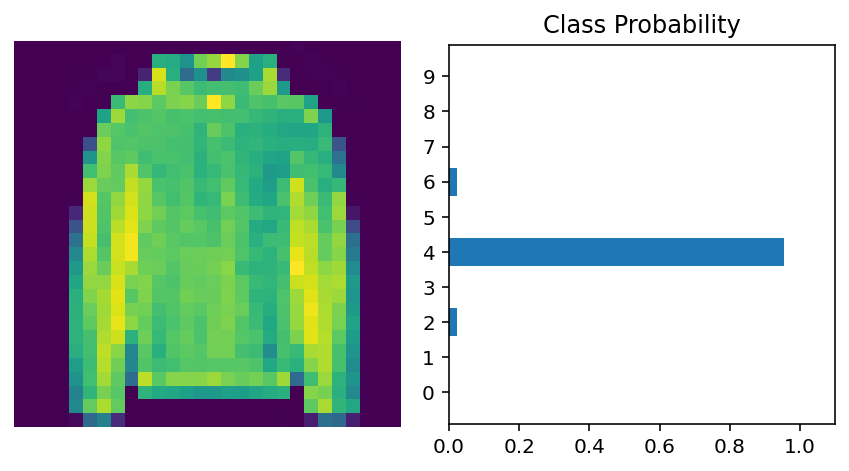

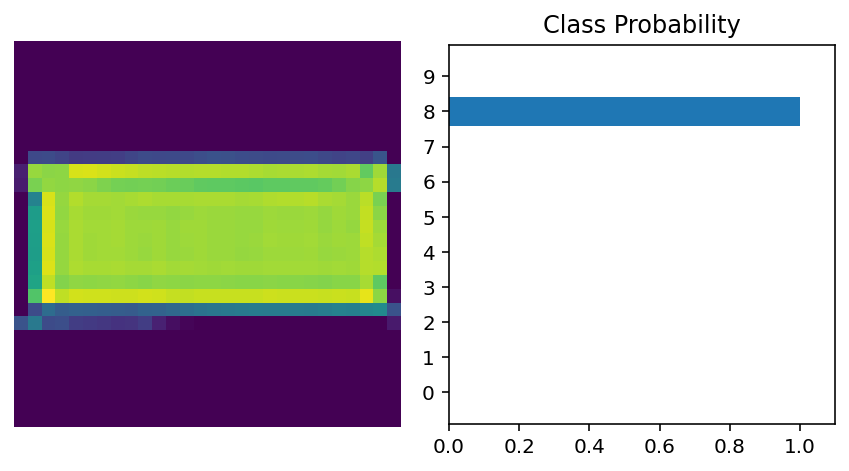

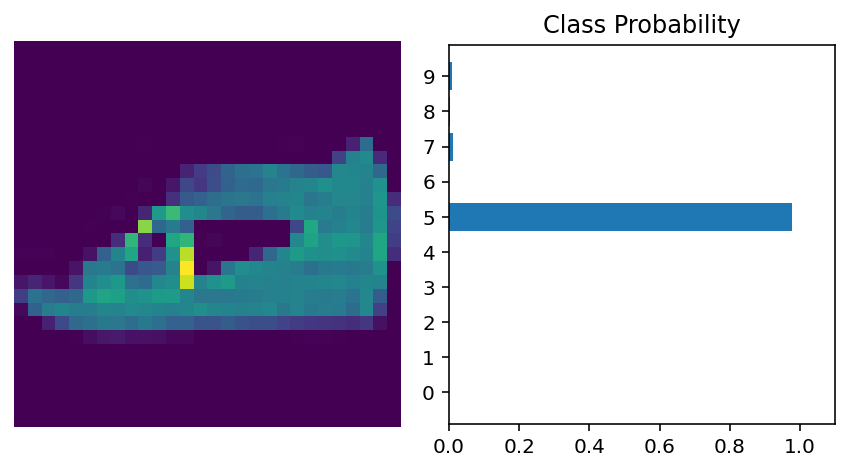

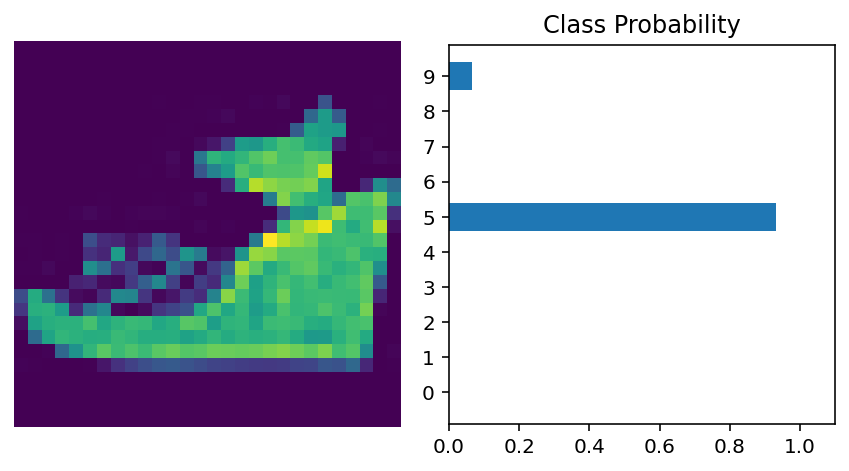

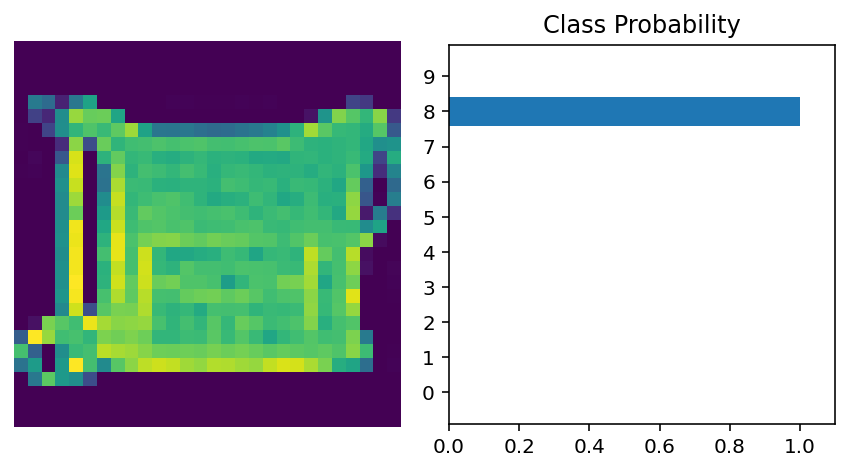

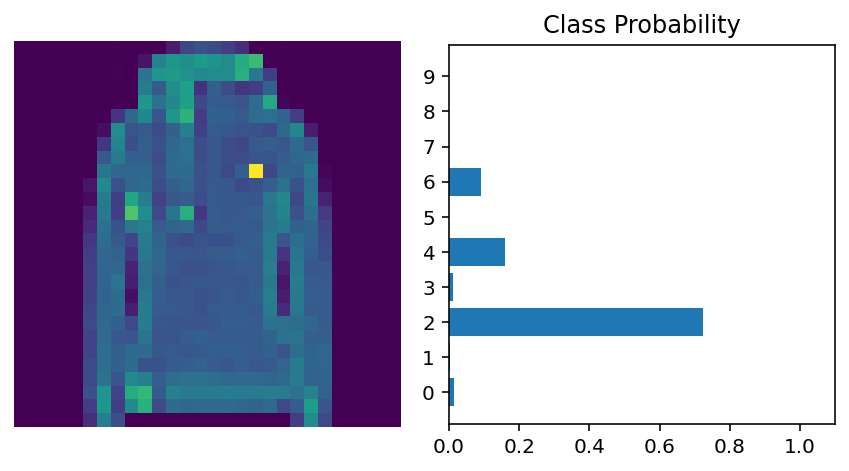

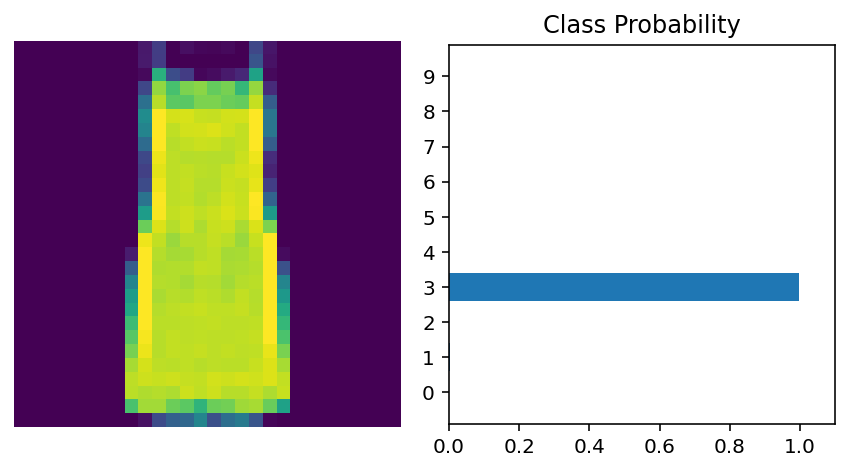

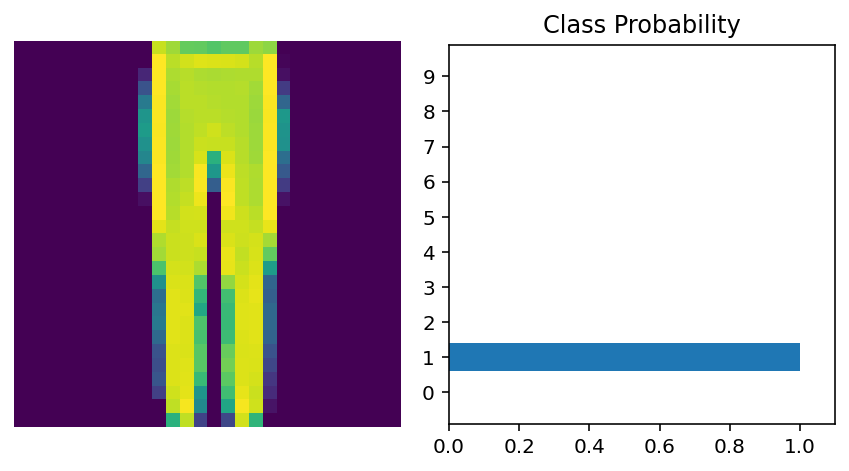

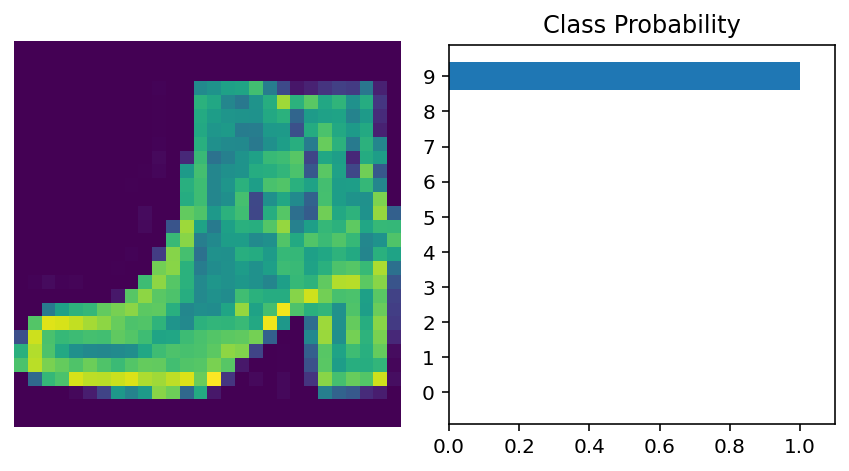

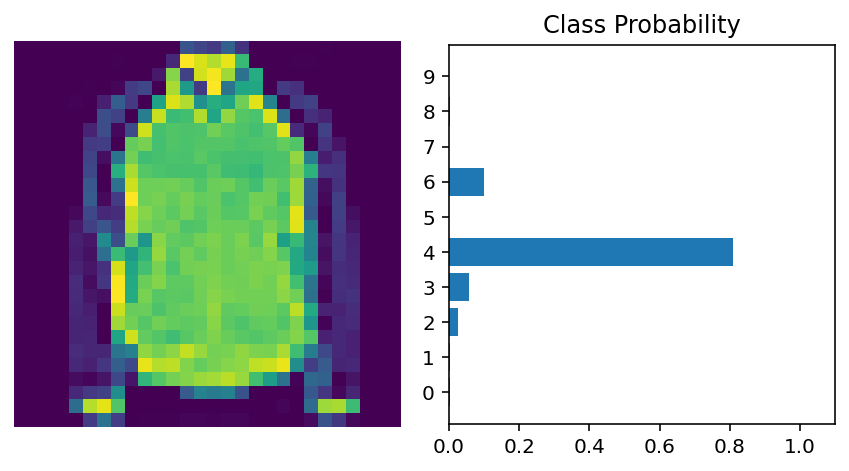

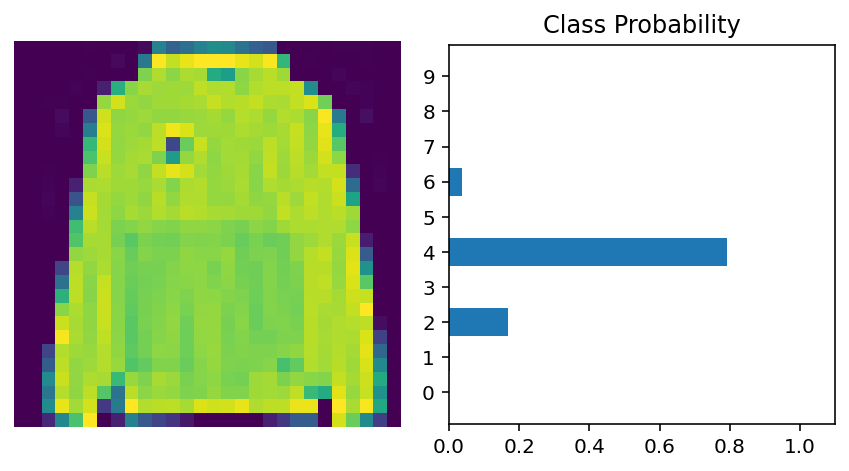

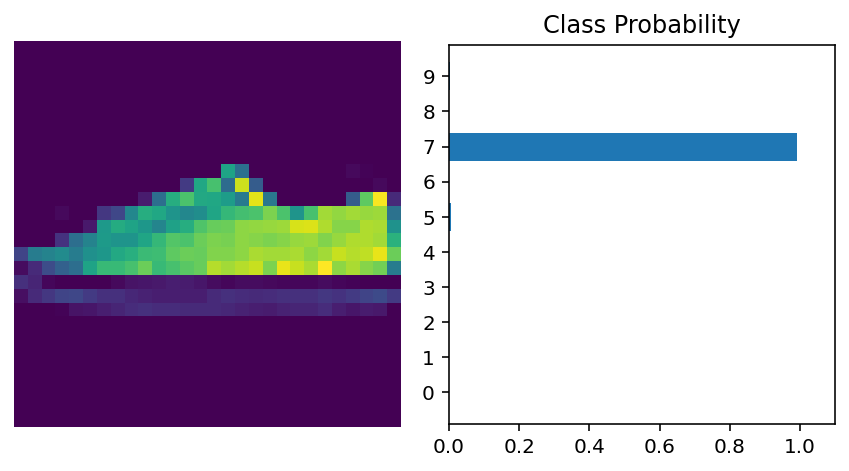

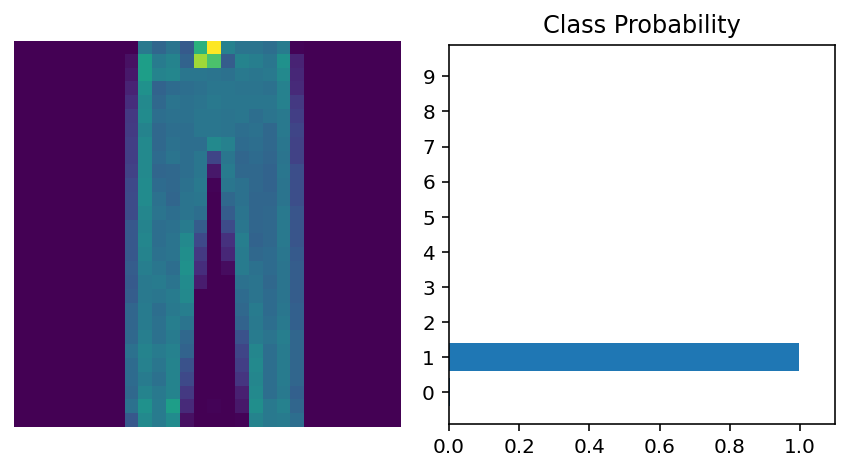

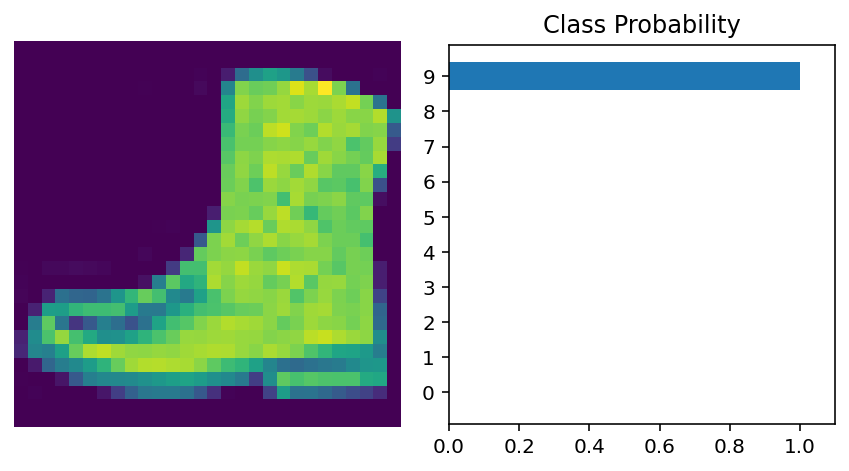

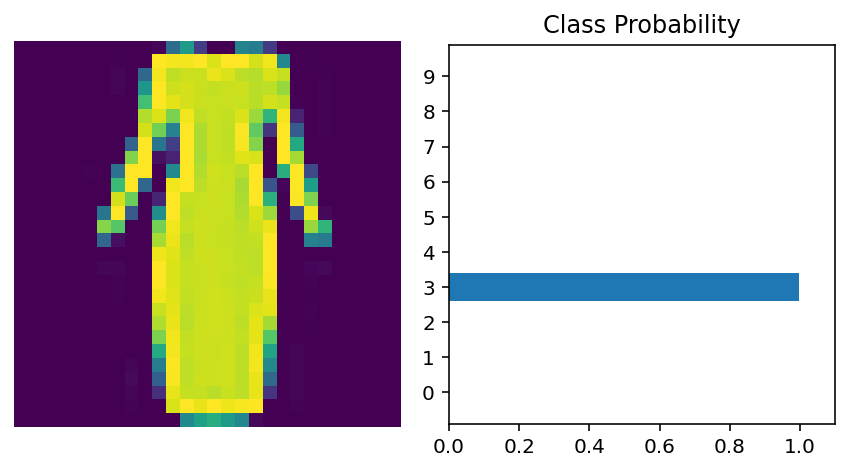

In [180]:

%matplotlib inline
import helper
for i in range(15):
  images, labels = next(iter(trainloader))

  img = images[0].view(1, 784)
  # Turn off gradients to speed up this part
  with torch.no_grad():
      logps = model(img)

  # Output of the network are log-probabilities, need to take exponential for probabilities
  ps = torch.exp(logps)
  view_classify(img.view(1, 28, 28), ps,version='MNIST')

# **Fashion MNIST Dataset**

In [0]:
import torch
from torchvision import datasets,transforms


In [0]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
#creating transformation for the data set by using prebuilt library of PyTorch
trainset=datasets.FashionMNIST('F_MNIST/',train=True,transform=transform,download=True)
#downloading the fashion mnist dataset and applying transformation to it
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#loading the data using the prebuilt library from pytorch with random shuffling and batch size=64


In [0]:
testset=datasets.FashionMNIST('test_FMNIST/',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
from torch.nn import functional as F

In [0]:
class Network(nn.Module):
  def __init__(net):
    super().__init__()
    net.input1=nn.Linear(784,512)
    net.hidden1=nn.Linear(512,256)
    net.hidden2=nn.Linear(256,128)
    net.hidden3=nn.Linear(128,64)
    net.output=nn.Linear(64,10)

  def forward(net,x):
    x=F.relu(net.input1(x))
    x=F.relu(net.hidden1(x))
    x=F.relu(net.hidden2(x))
    x=F.relu(net.hidden3(x))
    x=F.log_softmax(net.output(x),dim=1)
    return x

In [172]:
model=Network()
print(model)

Network(
  (input1): Linear(in_features=784, out_features=512, bias=True)
  (hidden1): Linear(in_features=512, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
from torch import optim
optimizer=optim.SGD(model.parameters(),lr=0.015)
#choosing an diferent optimizer justfor testing
criterion=nn.CrossEntropyLoss()
#choosing Cross Entropy Loss as a criterion for Loss Function

In [176]:
## Train the  Network
epoch=10
for e in range(epoch):
  running_loss=0
  for image,label in trainloader:
    image=image.view(image.shape[0],-1)
    optimizer.zero_grad()
    output=model(image)
    loss=criterion(output,label)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    #The item() method extracts the loss’s value as a Python float.
  else:
    print(running_loss/len(trainloader))

0.46451283401962534
0.414885822564427
0.3864067848811526
0.3628340609498751
0.34544645086216774
0.3297869453250345
0.31819906916572593
0.305595277588187
0.29470437323487897
0.2854853616848683


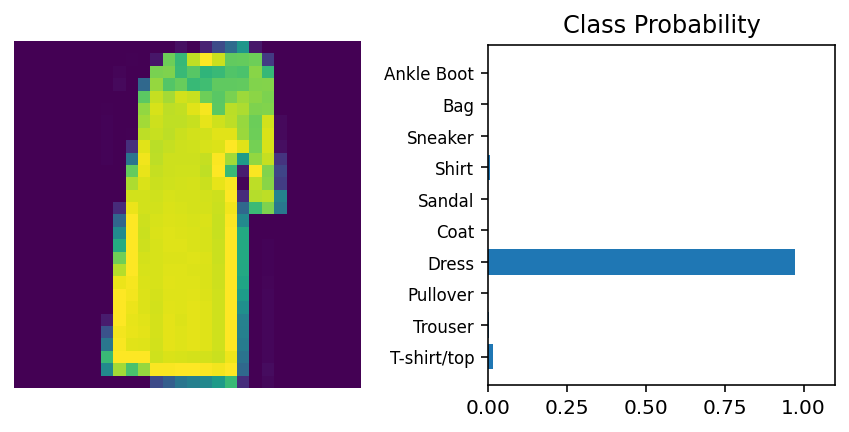

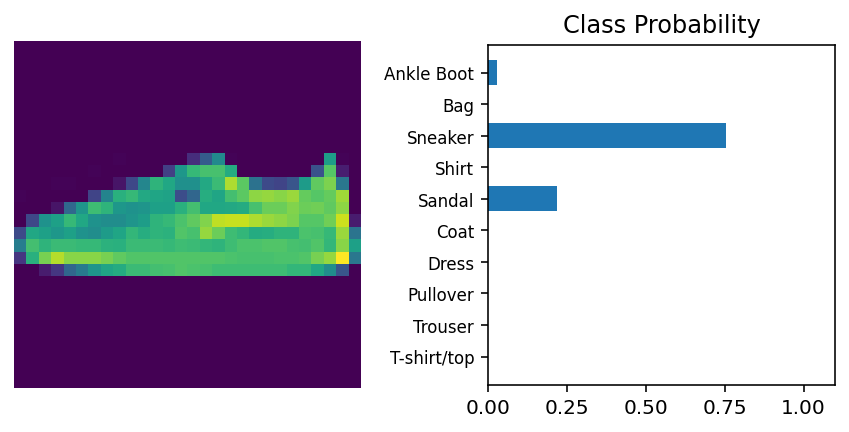

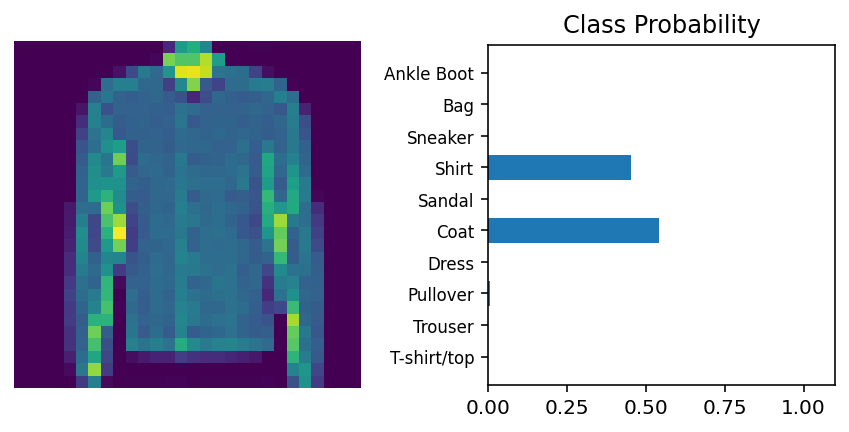

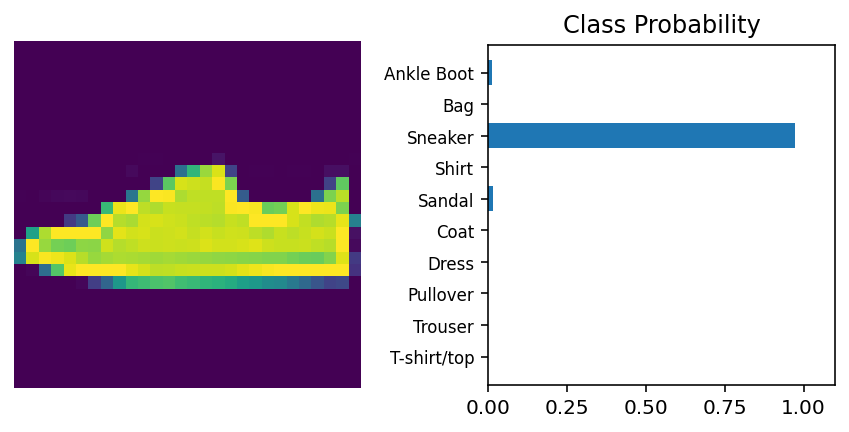

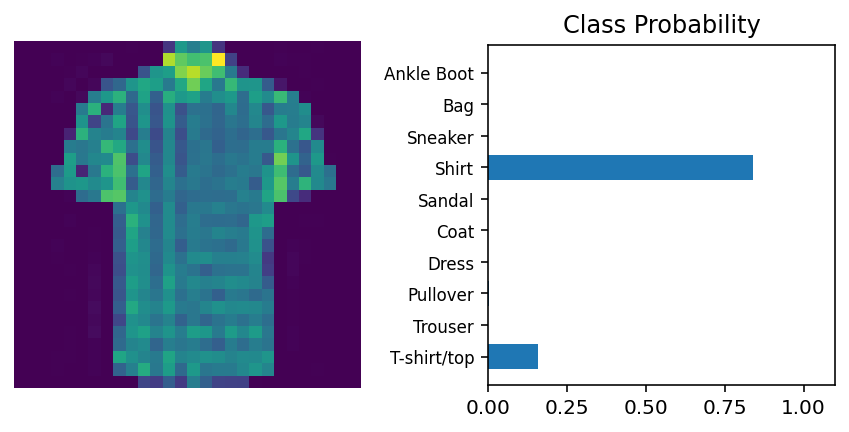

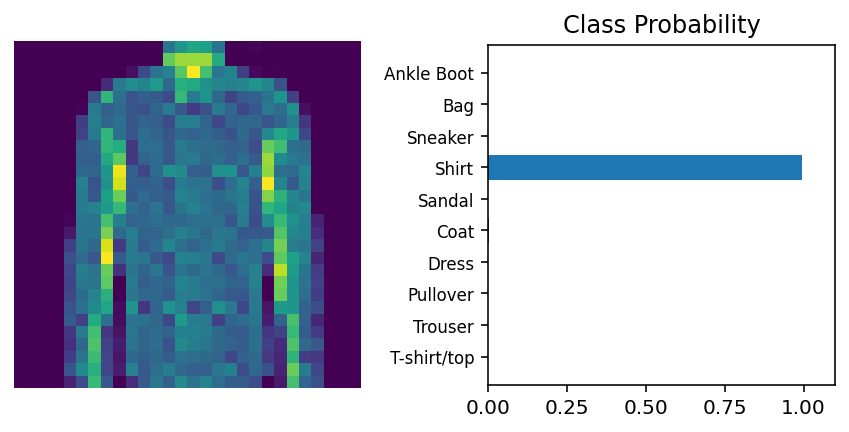

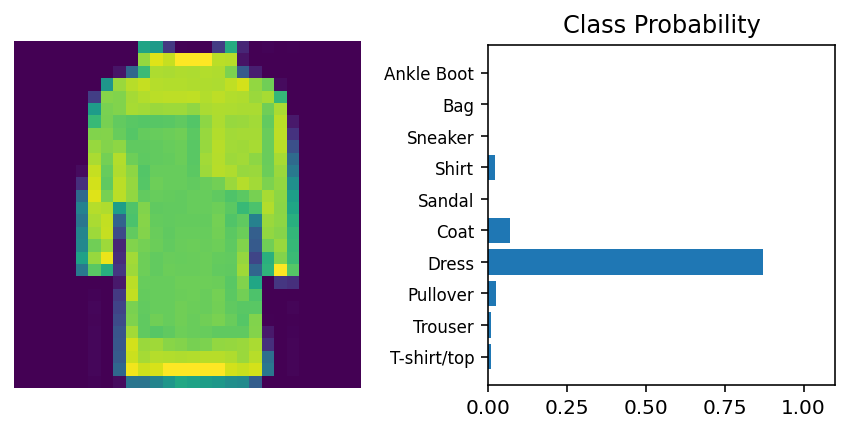

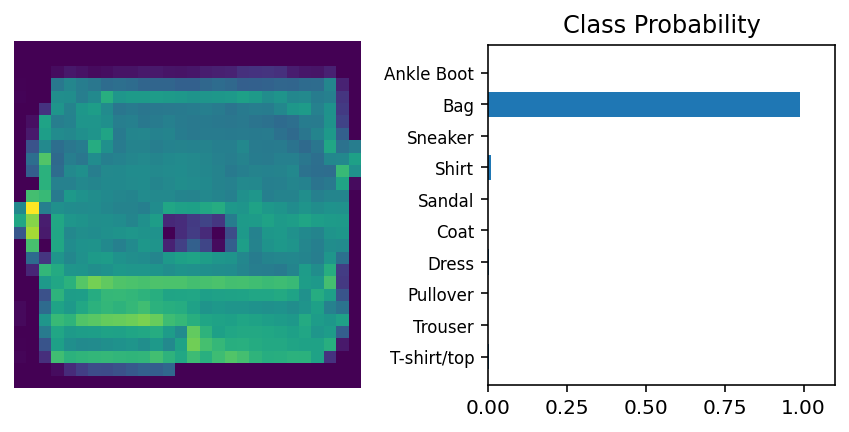

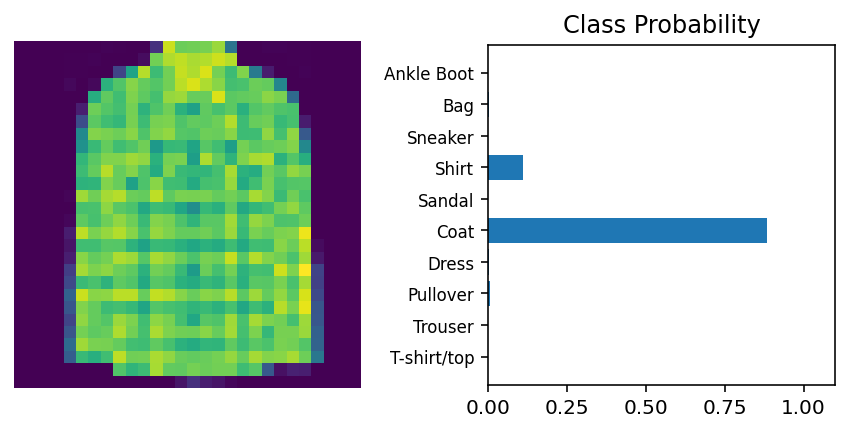

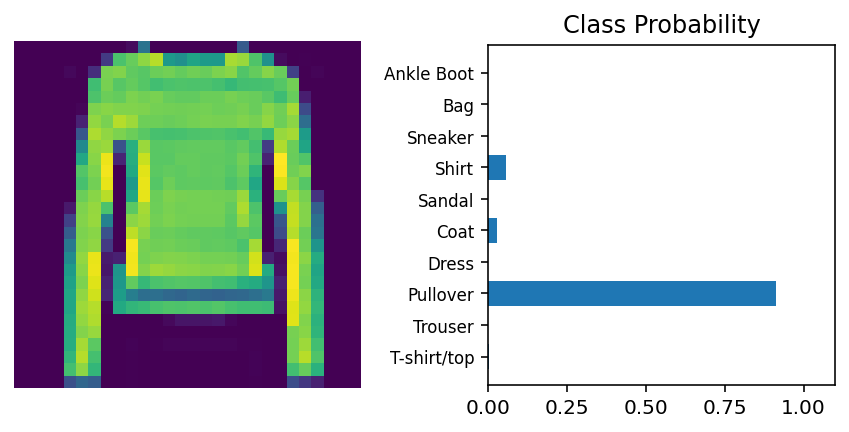

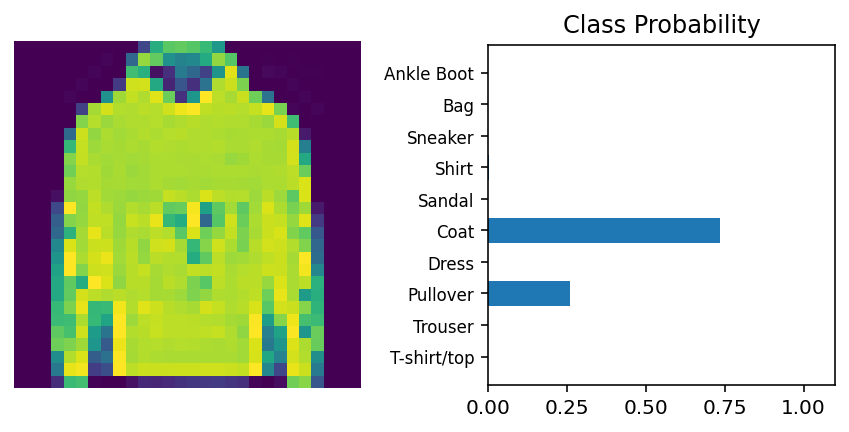

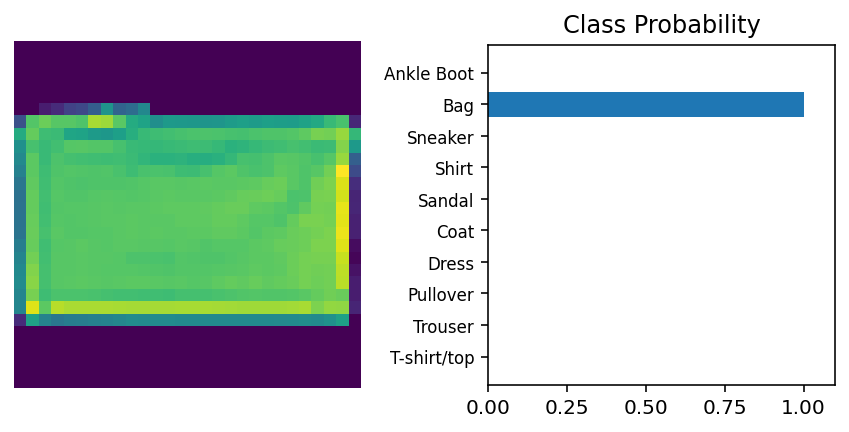

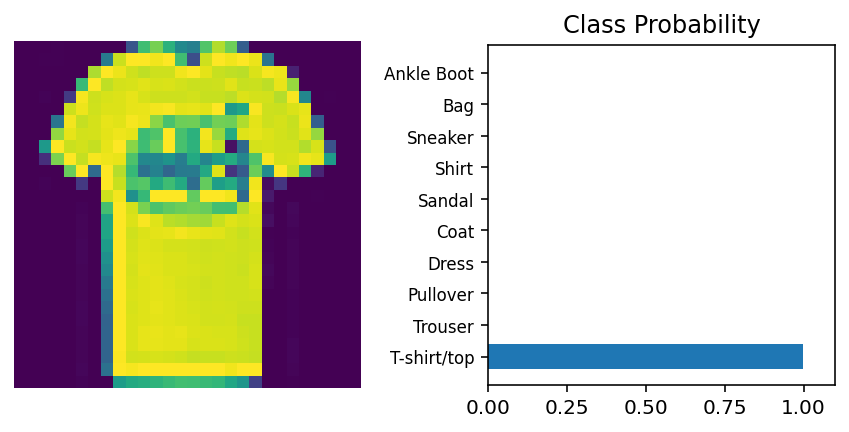

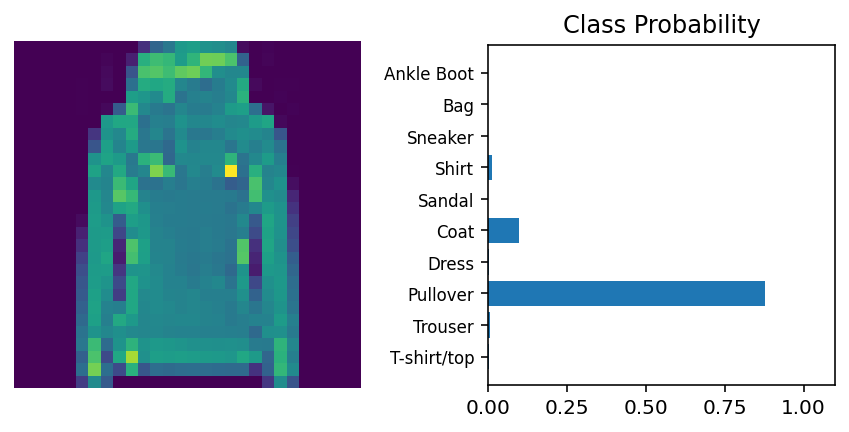

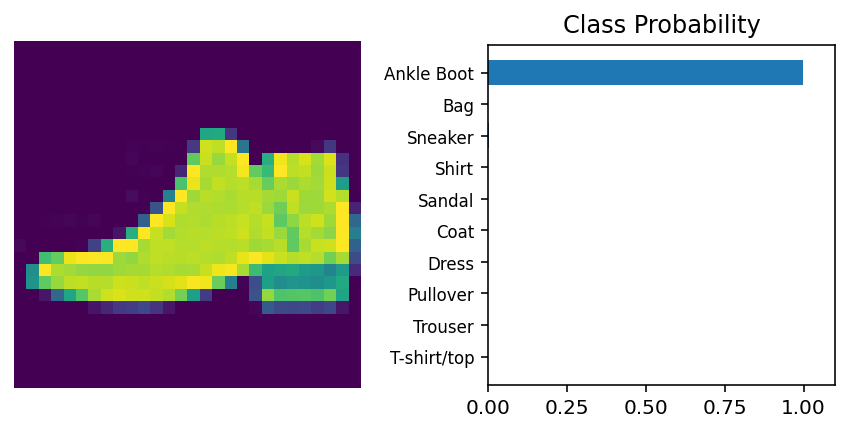

In [179]:
for i in range(15):  
  dataiter = iter(testloader)
  images, labels = dataiter.next()
  img = images[0]
  # Convert 2D image to 1D vector
  img = img.resize_(1, 784)

  # TODO: Calculate the class probabilities (softmax) for img
  ps = torch.exp(model(img))

  # Plot the image and probabilities
  view_classify(img.resize_(1, 28, 28), ps, version='Fashion')